# My First PyTorch Model

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

In [9]:
print(sys.version)
print(torch.__version__)


3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
2.4.0


**##nn is for the neural netweorks optim is the optimizer # timm is a great library for importing data.**

# Step 1. PyTorch Dataset ( & DataLoader)

In [10]:
class PlayingCardDataset(Dataset):
    def __init__(self,data_dir,transform=None):
        self.data=ImageFolder(data_dir, transform=transform)
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [11]:
dataset=PlayingCardDataset(data_dir ='/kaggle/input/card-image-dataset/train')


In [12]:
len(dataset)

7624

34


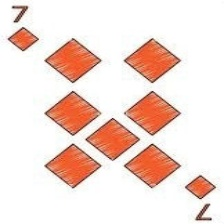

In [13]:
image,label=dataset[5000]

print(label)
image

In [14]:
#Get a dictionary assosciating target values with folder names
data_dir='/kaggle/input/card-image-dataset/train'
target_to_classes={v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_classes)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [15]:
transform= transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

data_dir='/kaggle/input/card-image-dataset/train'
dataset=PlayingCardDataset(data_dir,transform)

In [16]:
image,label=dataset[100]
image.shape

torch.Size([3, 128, 128])

In [17]:
#iterate over the dataset
for image,label in dataset:
    break

# Dataloader

* batching our dataset

In [18]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [19]:
for images ,labels in dataloader:
    break

In [20]:
images.shape,labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [21]:
labels  #it is random coz we kept shuffle as true

tensor([44, 38, 11, 24, 21, 41, 21, 18, 12, 51,  5, 18, 47, 31, 49,  2, 36, 39,
        24, 14, 31, 47, 22, 29,  9, 24, 22, 34, 28,  2, 39, 39])

# Step 2 . PyTorch Model 

Pytorch datasets have a structured way of organizing your data, pytorch models have a similar paradigm. 

* We could create the model from scratch defining each layer
* Howeverfor tasks like image classification, many of the state of the art architectures are readily available and we can import them from packages like timm
* Understanding the pytorch model is all about understanding the shape the data is at each layer and the main one we need to modify for a task si the final layer.Here we have 52 * 4 targets so we will modify the last layer for this

In [22]:
class SimpleCardClassifer(nn.Module):
    def __init__(self,num_classes=53):
        super(SimpleCardClassifer,self).__init__()
        #here we define all parts of the model
        self.base_model=timm.create_model('efficientnet_b0',pretrained=True)
        self.features=nn.Sequential(*list(self.base_model.children())[:-1])
        enet_out_size=1280
        #Make a classifier
        self.classifier=nn.Linear(enet_out_size,num_classes)
        
        
        
    def forward(self,x):
        #connect these parts and return the output
        x=self.features(x)
        output=self.classifier(x)
        return output
    

In [23]:
model=SimpleCardClassifer(num_classes=53)

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [24]:
print(str(model)[:500])

SimpleCardClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=Fal


In [25]:
model(images)

tensor([[-0.1126,  0.3385,  0.6371,  ...,  0.3541,  0.4941, -0.3553],
        [ 0.3452,  0.2600, -0.0308,  ...,  0.0519,  0.1625, -0.1200],
        [-0.0351,  0.0638,  0.4704,  ...,  0.5038, -0.5432,  0.1647],
        ...,
        [-0.1569, -0.0186, -0.1020,  ..., -0.2836, -0.2656,  0.1729],
        [-0.1358,  0.1911, -0.0626,  ...,  0.1005, -0.1625, -0.2175],
        [ 0.4515,  0.2053, -0.1051,  ..., -0.0312, -0.1956, -0.0259]],
       grad_fn=<AddmmBackward0>)

In [26]:
example_out=model(images)
example_out.shape #testing the model

torch.Size([32, 53])

# Step 3. The Training Loop

In [27]:
#Loss Function
criterion= nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [28]:
criterion(example_out,labels) #testing if the optimizer works

tensor(3.9046, grad_fn=<NllLossBackward0>)

# Setup Datasets

In [29]:
transform= transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_folder='/kaggle/input/card-image-dataset/train'
val_folder='/kaggle/input/card-image-dataset/valid'
test_folder='/kaggle/input/card-image-dataset/test'

train_dataset= PlayingCardDataset(train_folder, transform=transform)
val_dataset=PlayingCardDataset(val_folder, transform=transform)
test_dataset=PlayingCardDataset(test_folder, transform=transform)

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=32,shuffle=False)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [30]:
#turns out we were not using the gpu, so we need to modify the code

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [33]:
from tqdm import tqdm
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)
         
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.78it/s]


Epoch 1/5 - Train loss: 1.642929920244567, Validation loss: 0.2908249468173621


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 11.69it/s]


Epoch 2/5 - Train loss: 0.5840945296372597, Validation loss: 0.19506072593185136


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.32it/s]


Epoch 3/5 - Train loss: 0.35508879142005195, Validation loss: 0.128872309428341


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 13.25it/s]


Epoch 4/5 - Train loss: 0.244002471057403, Validation loss: 0.15825849951438184


Validation loop: 100%|██████████| 9/9 [00:00<00:00, 12.42it/s]


Epoch 5/5 - Train loss: 0.17832728605111522, Validation loss: 0.13430262489138908


## Visualize Losses 

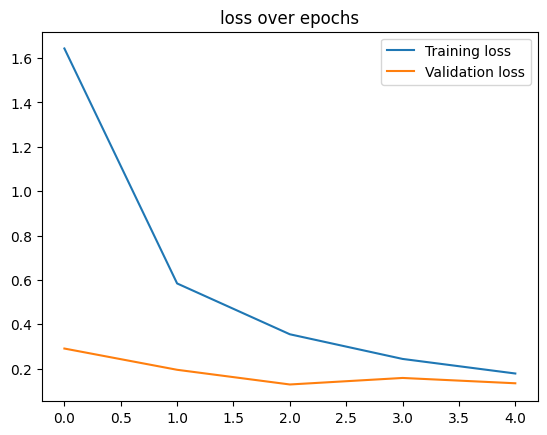

In [34]:
plt.plot(train_losses,label="Training loss")
plt.plot(val_losses,label="Validation loss")
plt.legend()
plt.title("loss over epochs")
plt.show()

# Bonus : Evaluation the Results

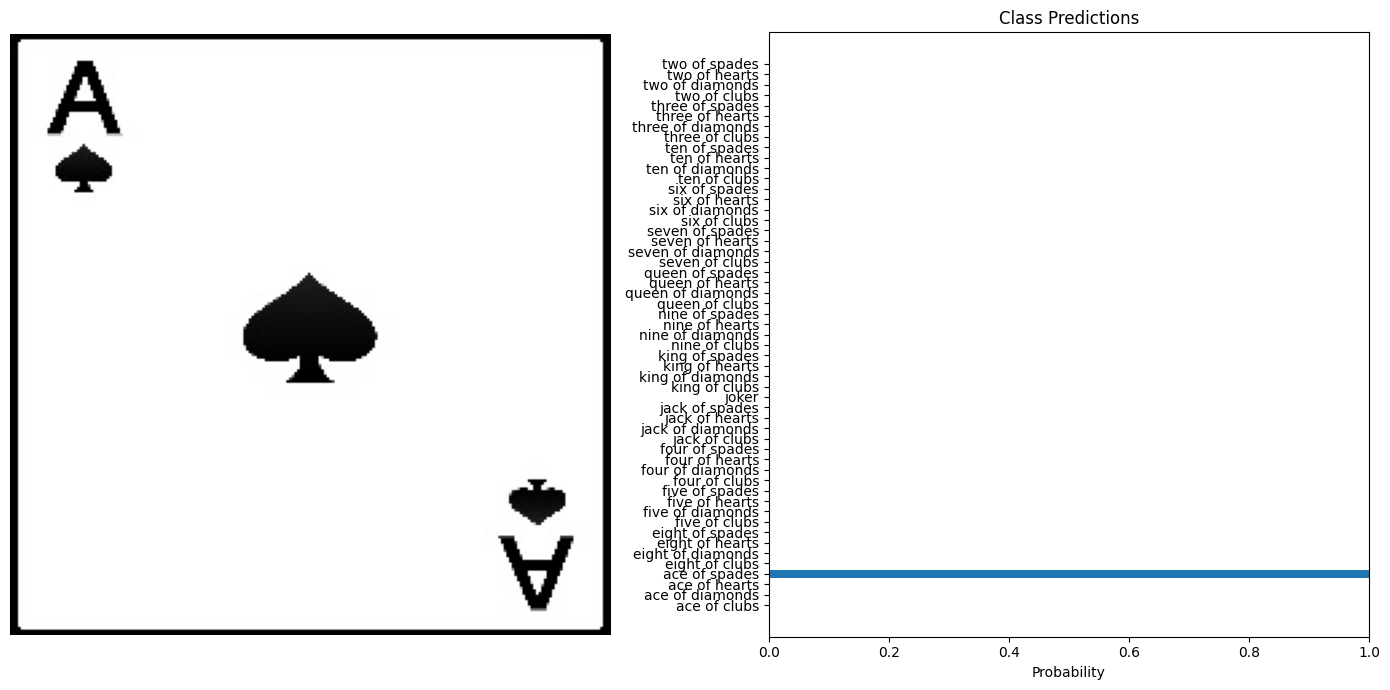

In [39]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as n


#Load and preprocess the images

def preprocess_img(img_path,transform):
    image=Image.open(img_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# predict using model

def predict(model,img_tensor,device):
    model.eval()
    with torch.no_grad():
        img_tensor=img_tensor.to(device)
        outputs=model(img_tensor)
        probabilities=torch.nn.functional.softmax(outputs,dim=1)
    return probabilities.cpu().numpy().flatten()

#visualization

def visualize_preds(original_img,probabilities,class_names):
    fig,axarr=plt.subplots(1,2,figsize=(14,7))
    
    # Display image
    axarr[0].imshow(original_img)
    axarr[0].axis("off")
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()
    
#example usage

test_img= '/kaggle/input/card-image-dataset/test/ace of spades/1.jpg'
transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor() ])

original_img,img_tensor=preprocess_img(test_img,transform)
probabilities=predict(model,img_tensor,device)

#Assuming dataset.classes gives the class name

class_names=dataset.classes
visualize_preds(original_img,probabilities,class_names)


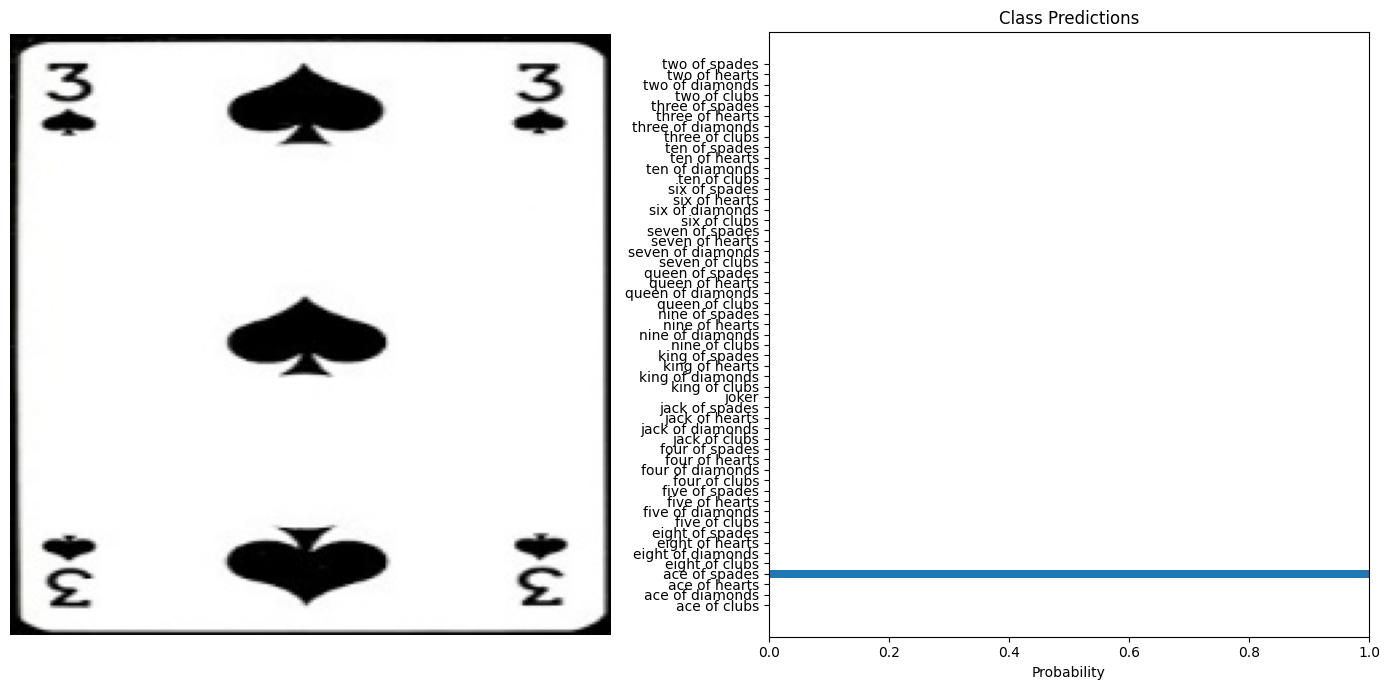

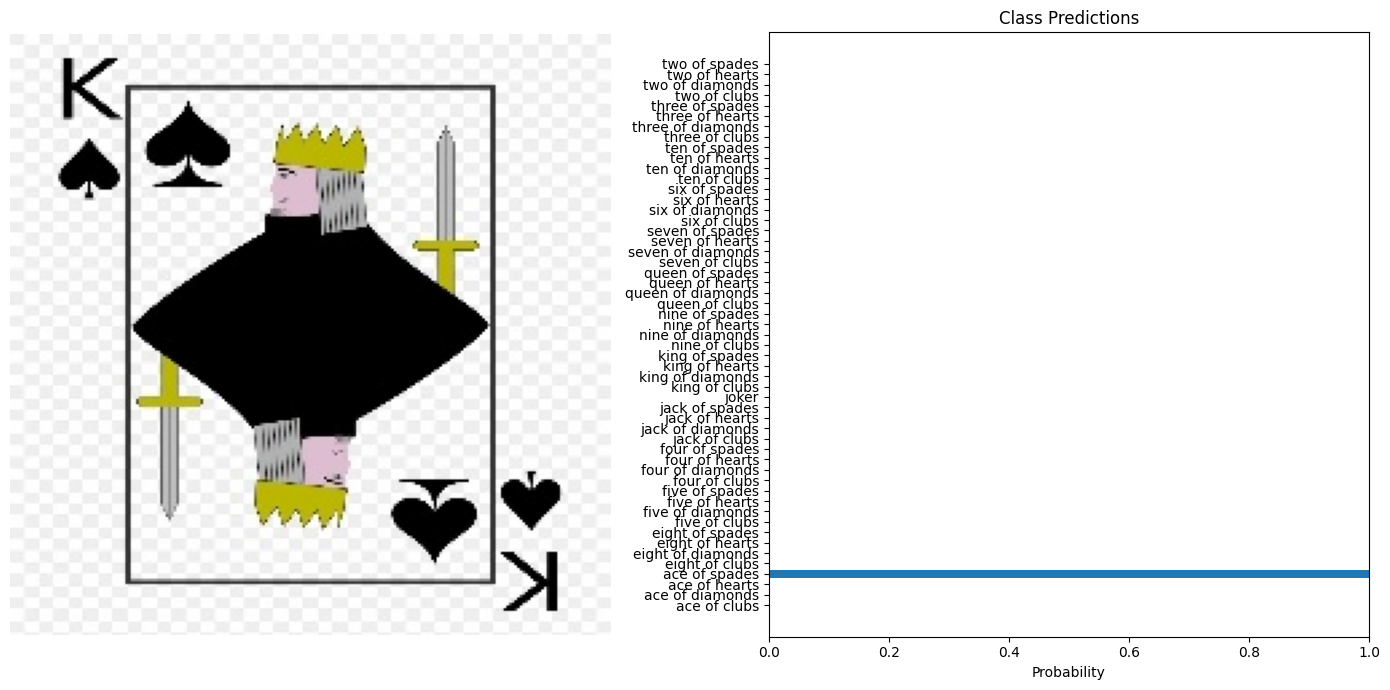

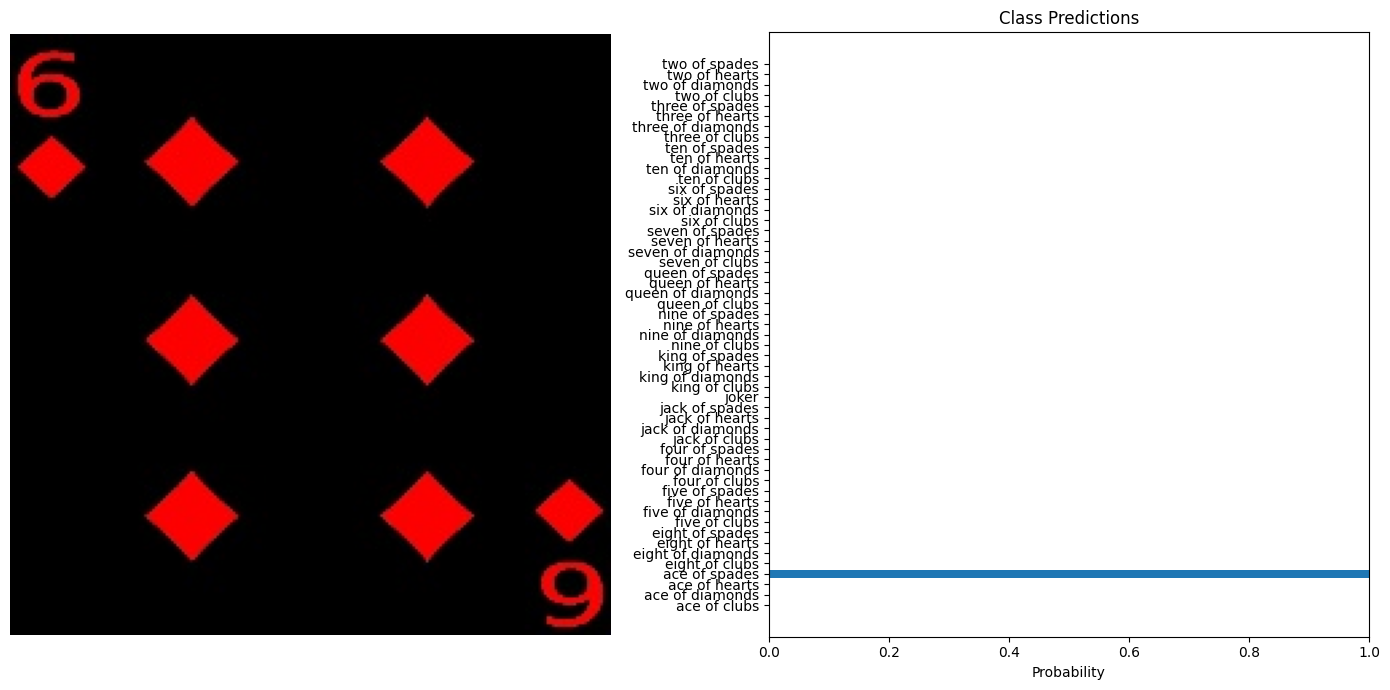

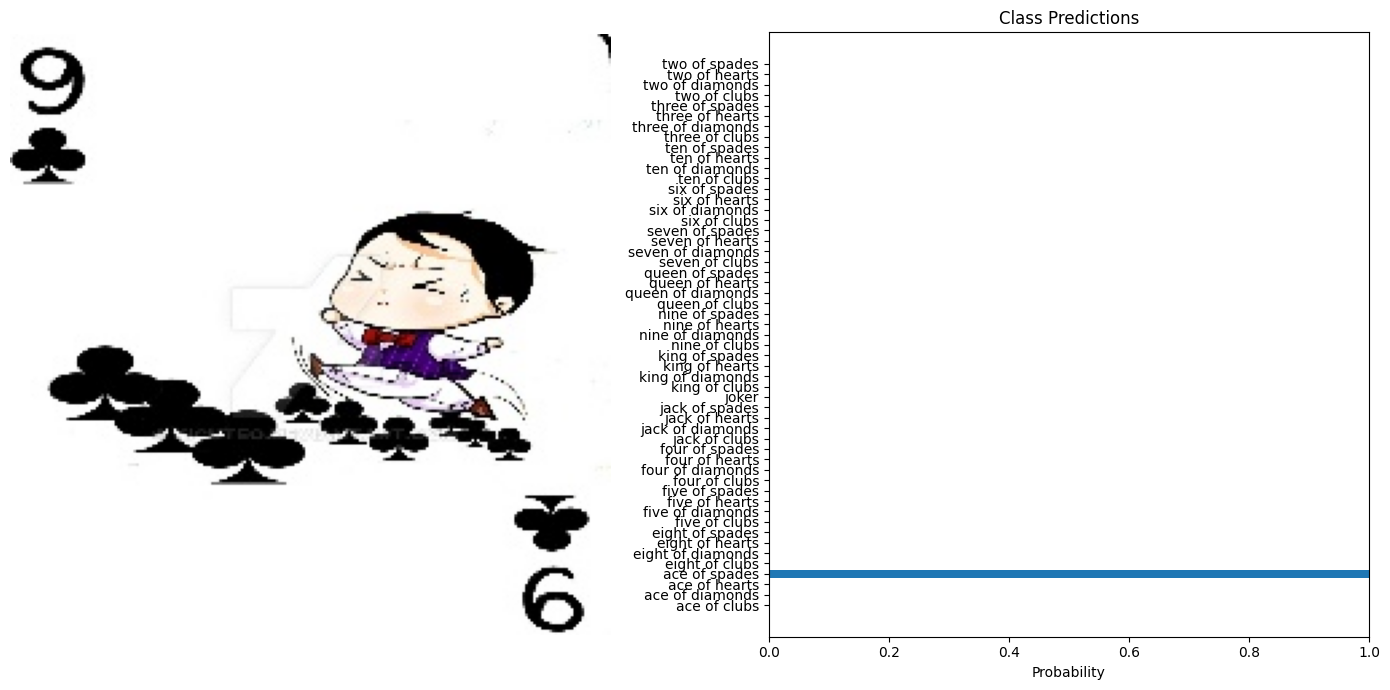

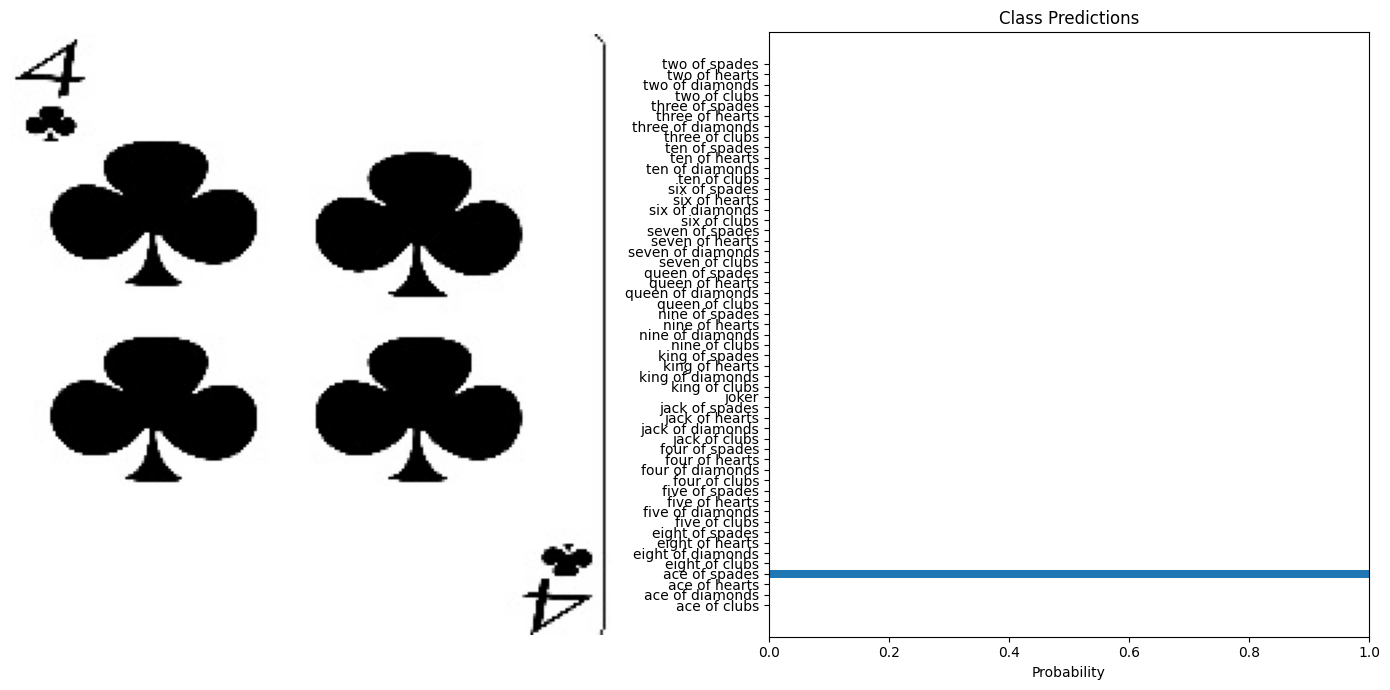

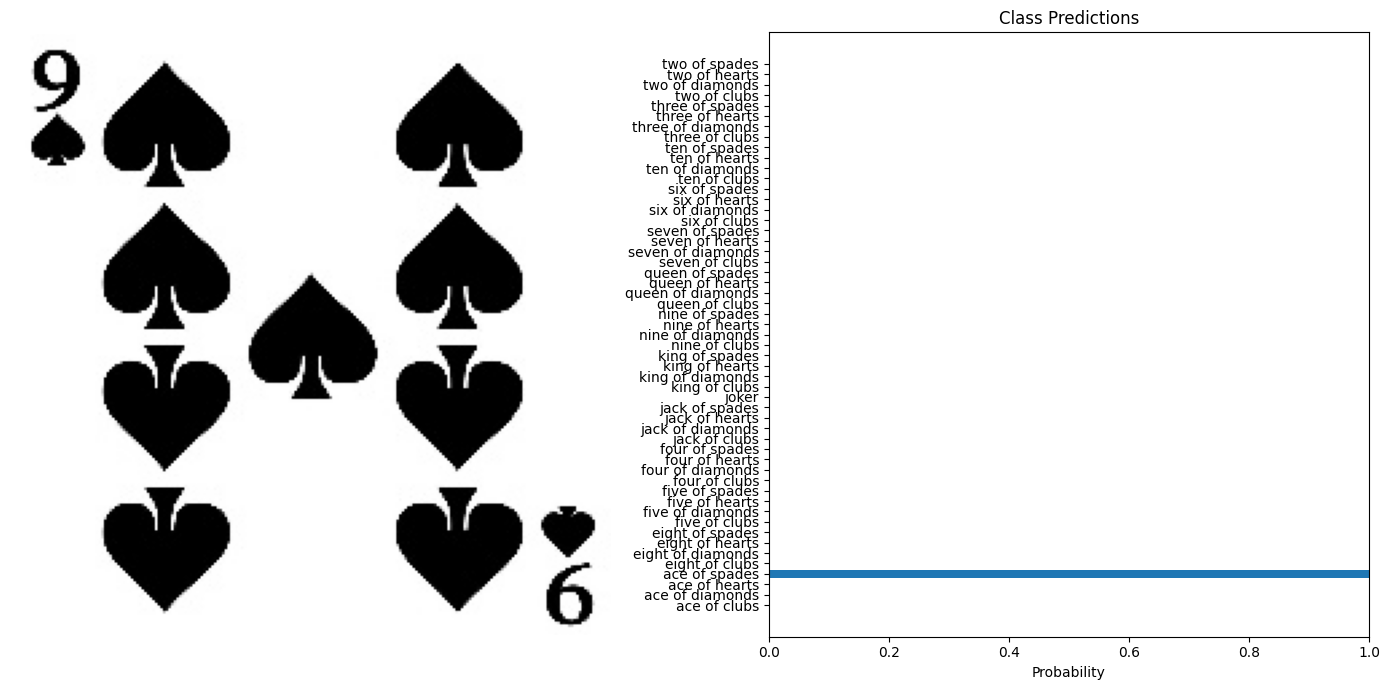

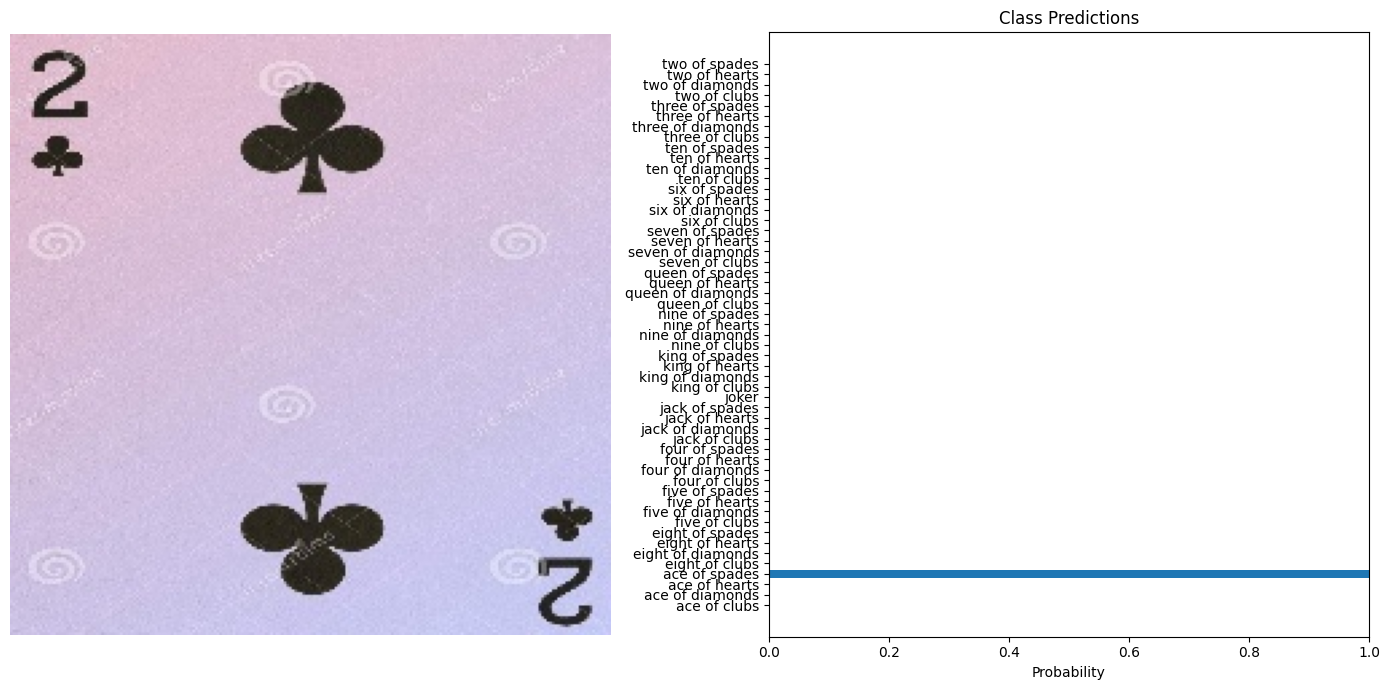

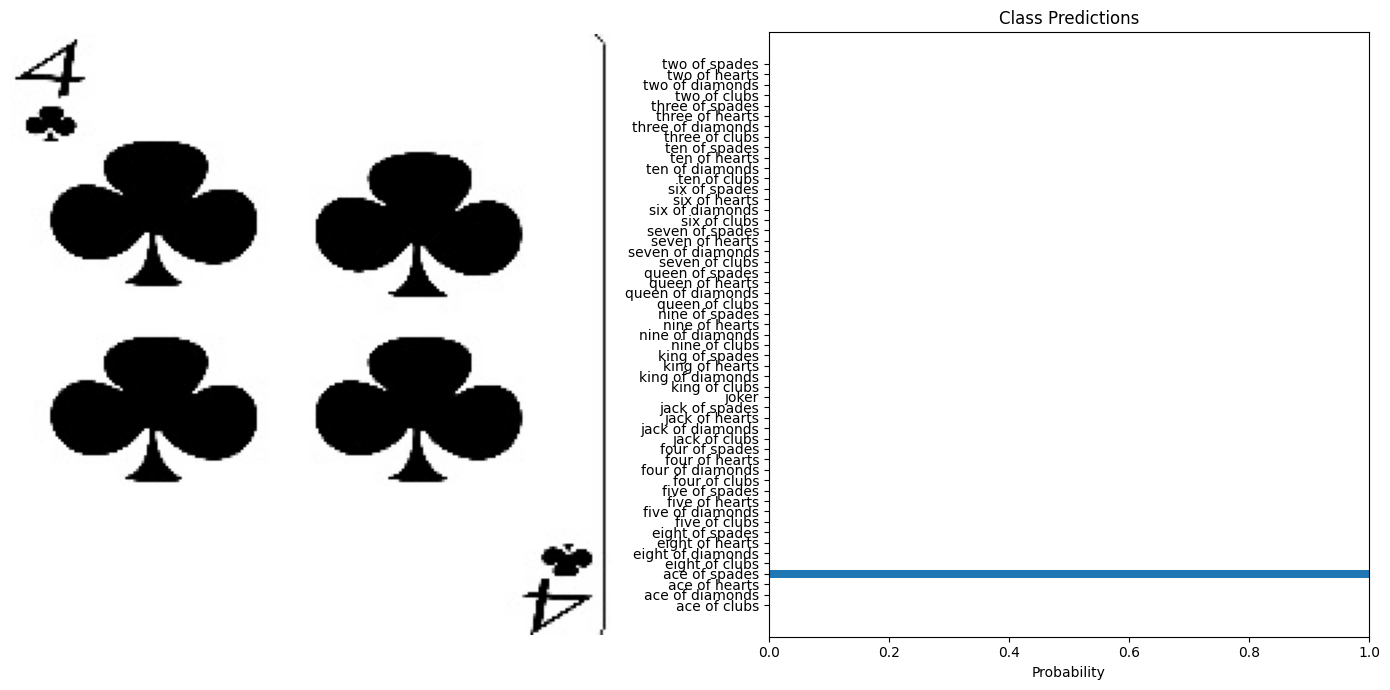

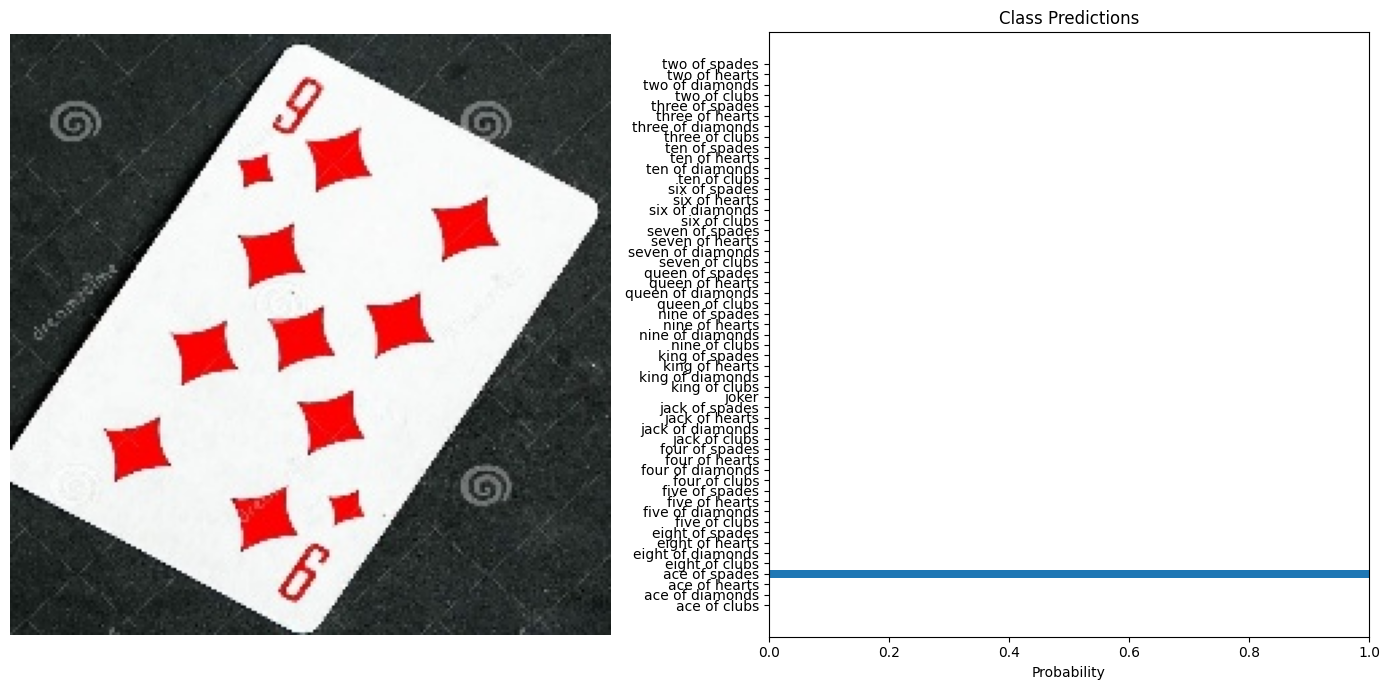

In [41]:
from glob import glob
test_images = glob('/kaggle/input/card-image-dataset/test/*/*')
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
    original_img, image_tensor = preprocess_img(example, transform)
    probabilities = predict(model, img_tensor, device)

    # Assuming dataset.classes gives the class names
    class_names = dataset.classes 
    visualize_preds(original_img, probabilities, class_names)

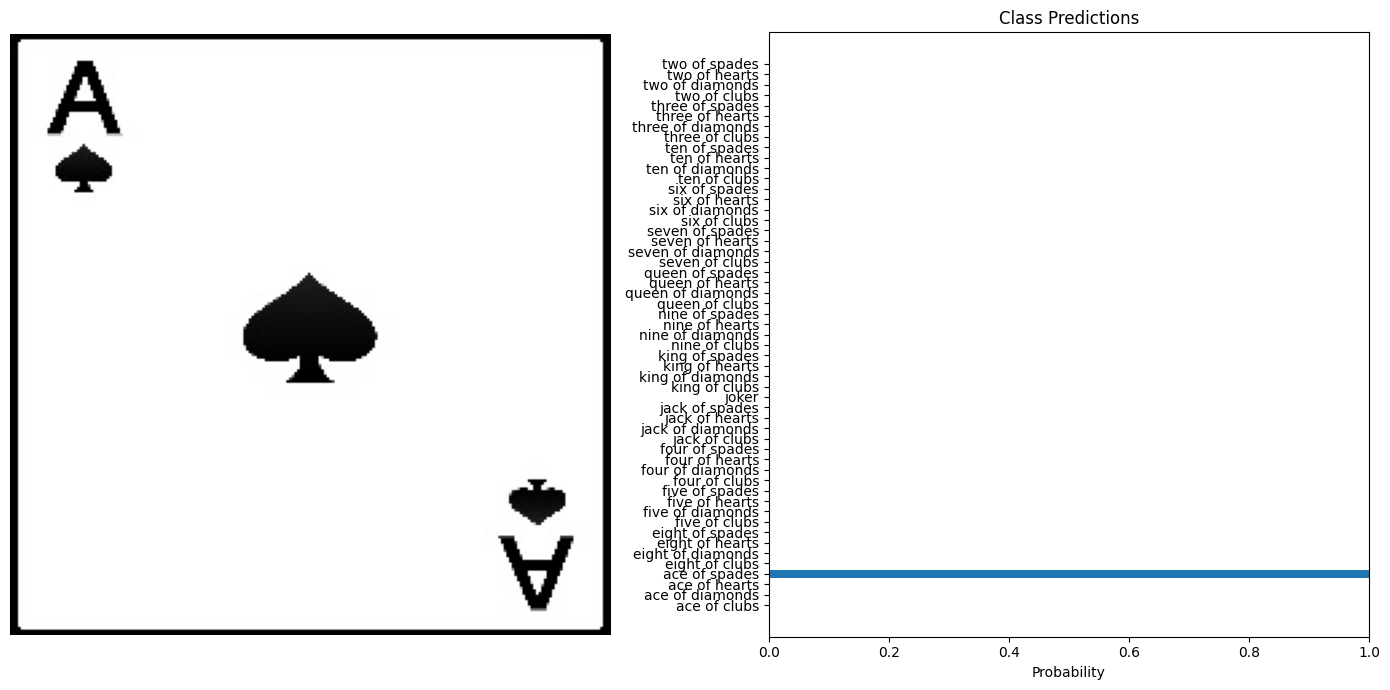

Accuracy on the test dataset: 94.72%


In [42]:
# Load and preprocess the images
def preprocess_img(img_path, transform):
    image = Image.open(img_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

# Predict using the model
def predict(model, img_tensor, device):
    model.eval()
    with torch.no_grad():
        img_tensor = img_tensor.to(device)
        outputs = model(img_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# Visualization
def visualize_preds(original_img, probabilities, class_names):
    fig, axarr = plt.subplots(1, 2, figsize=(14, 7))
    
    # Display image
    axarr[0].imshow(original_img)
    axarr[0].axis("off")
    
    # Display predictions
    axarr[1].barh(class_names, probabilities)
    axarr[1].set_xlabel("Probability")
    axarr[1].set_title("Class Predictions")
    axarr[1].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

# Function to calculate accuracy
def calculate_accuracy(model, test_images, transform, device, class_names):
    correct = 0
    total = len(test_images)

    model.eval()
    with torch.no_grad():
        for image_path in test_images:
            # Preprocess and predict
            original_img, img_tensor = preprocess_img(image_path, transform)
            img_tensor = img_tensor.to(device)
            probabilities = predict(model, img_tensor, device)
            
            # Get the predicted class index
            predicted_idx = np.argmax(probabilities)
            
            # Extract actual class from folder name
            actual_class_name = image_path.split('/')[-2]  # Folder name is the class
            actual_idx = class_names.index(actual_class_name)
            
            # Check if prediction is correct
            if predicted_idx == actual_idx:
                correct += 1

    # Calculate accuracy
    accuracy = (correct / total) * 100
    return accuracy

# Example usage

# Assuming you have a test image path and dataset with class names
test_images = glob('/kaggle/input/card-image-dataset/test/*/*')
test_img = '/kaggle/input/card-image-dataset/test/ace of spades/1.jpg'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Assuming 'model' is your trained model and 'device' is 'cpu' or 'cuda'
original_img, img_tensor = preprocess_img(test_img, transform)
probabilities = predict(model, img_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes

# Visualize the predictions
visualize_preds(original_img, probabilities, class_names)

# Calculate accuracy for a subset of test images
accuracy = calculate_accuracy(model, test_images, transform, device, class_names)
print(f'Accuracy on the test dataset: {accuracy:.2f}%')
